In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [14]:
# 下载Iris数据集
iris = load_iris()
iris_data = iris.data
iris_target = iris.target
iris_feature_names = iris.feature_names

iris_df = pd.DataFrame(data=iris_data, columns=iris_feature_names)
iris_df['target'] = iris_target

In [15]:
# 线性回归，通过花瓣宽度预测花瓣长度、通过花萼宽度预测花萼长度
X = iris_df.iloc[:,2].values.reshape(-1, 1)       # iris_df[['petal width (cm)']]
y = iris_df.iloc[:,3]                           # iris_df['petal length (cm)']
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

通过 petal length (cm) 预测 petal width (cm)
准确率：0.9146668551555123
------------------------------------------
通过 petal length (cm) 预测 petal width (cm)
准确率：0.8345785962288641
------------------------------------------
通过 petal length (cm) 预测 petal width (cm)
准确率：0.6989054205156312
------------------------------------------
通过 petal length (cm) 预测 petal width (cm)
准确率：0.5076473280158136
------------------------------------------


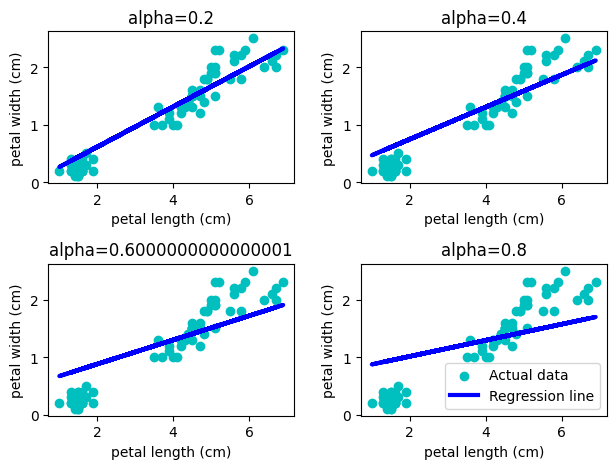

In [16]:
for i in range(4):
    # 回归
    alpha=0.2*(i+1)
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # 准确率评估
    print('通过',iris_df.columns[2], '预测' , iris_df.columns[3])
    accuracy=model.score(X_test,y_test)
    print(f'准确率：{accuracy}')
    print('------------------------------------------')
    plt.subplot(2,2,i+1)
    plt.scatter (X_test, y_test,
                color='c',
                label='Actual data')

    plt.plot    (X_test, y_pred, 
                color='blue', 
                linewidth=3, 
                label='Regression line')
    plt.xlabel(iris_df.columns[2])
    plt.ylabel(iris_df.columns[3])
    plt.title('alpha='+str(alpha))
plt.legend()
plt.tight_layout()
plt.show()